# Hebb則と教師なし学習
## Hebb則
神経回路はどのようにして自己組織化するのだろうか．1940年代にカナダの心理学者Donald O. Hebbにより著書"The Organization of Behavior"{cite:p}`Hebb1949-iv` で提案された学習則は「細胞Aが反復的または持続的に細胞Bの発火に関与すると，細胞Aが細胞Bを発火させる効率が向上するような成長過程または代謝変化が一方または両方の細胞に起こる」というものであった．すなわち，発火に時間的相関のある細胞間のシナプス結合を強化するという学習則である．これを**Hebbの学習則 (Hebbian learning rule)** あるいは**Hebb則(Hebb's rule)** という．Hebb則は (Hebb自身ではなく) Shatzにより"cells that fire together wire together" (共に活動する細胞は共に結合する)と韻を踏みながら短く言い換えられている {cite:p}`Shatz1992-he`．

### Hebb則の導出
数式でHebb則を表してみよう．$n$個のシナプス前細胞と$m$個の後細胞の発火率をそれぞれ$\mathbf{x}\in \mathbb{R}^n, \mathbf{y}\in \mathbb{R}^m$ とする．前細胞と後細胞間のシナプス結合強度を表す行列を$\mathbf{W}\in \mathbb{R}^{m\times n}$とし，$\mathbf{y}=\mathbf{W}\mathbf{x}$が成り立つとする．このようなモデルを線形ニューロンモデル (Linear neuron model) という．このとき，Hebb則は

$$
\tau\frac{d\mathbf{W}}{dt}=\phi(\mathbf{y})\varphi(\mathbf{x})^\top
$$

として表される．ただし，$\tau$は時定数であり，$\eta:=1/\tau$ は**学習率 (learning rate)** と呼ばれる学習の速さを決定するパラメータとなる．$\varphi(\cdot)$および$\phi(\cdot)$は，それぞれシナプス前細胞および後細胞の活動量に応じて重みの変化量を決定する関数である．ただし，$\varphi(\cdot), \phi(\cdot)$は基本的に恒等関数に設定される場合が多い．この場合，Hebb則は$
\tau\dfrac{d\mathbf{W}}{dt}=\mathbf{y}\mathbf{x}^\top=(\text{post})\cdot (\text{pre})^\top
$と簡潔に表現される．

このHebb則は数学的に導出されたものではないが，特定の目的関数を神経活動及び重みを変化させて最適化するようなネットワークを構築すれば自然に出現する．このようなネットワークを**エネルギーベースモデル (energy-based models)** といい，次章で扱う．エネルギーベースモデルでは，先にエネルギー関数 (あるいはコスト関数) $\mathcal{E}$ を定義し，その目的関数を最小化するような神経活動 $\mathbf{z}$ および重み行列 $\mathbf{W}$ のダイナミクスをそれぞれ,

$$
\frac{d \mathbf{z}}{dt}\propto-\frac{\partial \mathcal{E}}{\partial \mathbf{z}},\ \frac{d \mathbf{W}}{dt}\propto-\frac{\partial \mathcal{E}}{\partial \mathbf{W}}
$$

として導出する．この手順の逆を行う，すなわち先に神経細胞の活動ダイナミクスを定義し，神経活動で積分することで神経回路のエネルギー関数$\mathcal{E}$を導出し，さらに $\mathcal{E}$ を重み行列で微分することでHebb則が導出できる {cite:p}`Isomura2020-sn`．Hebb則の導出を連続時間線形ニューロンモデル $\dfrac{d\mathbf{y}}{dt}=\mathbf{W}\mathbf{x}$ を例にして考えよう．ここで$\dfrac{\partial\mathcal{E}}{\partial\mathbf{y}}:=-\dfrac{d\mathbf{y}}{dt}$となるようなエネルギー関数 $\mathcal{E}(\mathbf{x}, \mathbf{y}, \mathbf{W})$を仮定すると，

$$
\mathcal{E}(\mathbf{x}, \mathbf{y}, \mathbf{W})=-\int \mathbf{W}\mathbf{x}\ d\mathbf{y}=-\mathbf{y}^\top \mathbf{W}\mathbf{x} \in \mathbb{R}
$$

となる．これをさらに$\mathbf{W}$で微分すると，

$$
\dfrac{\partial\mathcal{E}}{\partial\mathbf{W}}=-\mathbf{y}\mathbf{x}^\top\Rightarrow
\frac{d\mathbf{W}}{dt}=-\dfrac{\partial\mathcal{E}}{\partial\mathbf{W}}=\mathbf{y}\mathbf{x}^\top
$$

となり，Hebb則が導出できる (簡単のため時定数は1とした)．

## Hebb則の安定化とLTP/LTD
### BCM則
Hebb則には問題点があり，シナプス結合強度が際限なく増大するか，0に近づくこととなってしまう．これを数式で確認しておこう．前細胞と後細胞がそれぞれ1つの場合を考える．2細胞間の結合強度を$w\ (>0)$ とし，$y=wx$が成り立つとすると，Hebb則は$\dfrac{dw}{dt}=\eta yx=\eta x^2w$となる．この場合，$\eta x^2>1$ なら $\lim_{t\to\infty} w= \infty$, $\eta x^2<1$ なら $\lim_{t\to\infty} w= 0$ となる．当然，生理的にシナプス結合強度が無限大となることはあり得ないが，不安定なほど大きくなってしまう可能性があることに違いはない．このため，Hebb則を安定化させるための修正が必要とされた．

Cooper, Liberman, Ojaらにより頭文字をとって**CLO則** (CLO rule) が提案された {cite:p}`Cooper1979-wz`．その後，Bienenstock, Cooper, Munroらにより提案された学習則は同様に頭文字をとって**BCM則** (BCM rule) と呼ばれている{cite:p}`Bienenstock1982-km` {cite:p}`Cooper2012-ec`．

$\mathbf{x}\in \mathbb{R}^d, \mathbf{w}\in \mathbb{R}^d, y\in \mathbb{R}$とし，単一の出力$y = \mathbf{w}^\top \mathbf{x}=\mathbf{x}^\top \mathbf{w}$を持つ線形ニューロンを仮定する．重みの更新則は次のようにする．

$$
\frac{d\mathbf{w}}{dt} = \eta_w \mathbf{x} \phi(y, \theta_m)
$$

ここで関数$\phi$は$\phi(y, \theta_m)=y(y-\theta_m)$などとする．また$\theta_m:=\mathbb{E}[y^2]$は閾値を決定するパラメータ，**修正閾値(modification threshold)** であり，

$$
\frac{d\theta_m}{dt} = \eta_{\theta} \left(y^2-\theta_m\right)
$$

として更新される．

*ToDo: 詳細*

In [1]:
using PyPlot, Random, Distributions, LinearAlgebra, FFTW
rc("axes.spines", top=false, right=false)
rc("font", family="Meiryo")

In [2]:
ϕ(y, θₘ) = y * (y - θₘ);

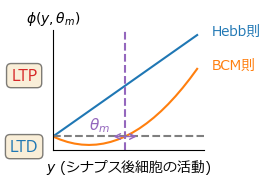

In [3]:
y = 0:0.1:2;
θₘ = 1.0
props = Dict("boxstyle" => "round", "facecolor" => "wheat", "alpha" => 0.5)
figure(figsize=(3, 2))
plot(y, 1.5*y, label="Hebb則")
plot(y, ϕ.(y, θₘ), label="BCM則")
xlim(0,); 
annotate(text="", xy=(0.8,0), xytext=(1.2,0), arrowprops=Dict("arrowstyle" => "<->", "color" => "tab:purple"))
axvline(θₘ, linestyle="dashed", color="tab:purple")
axhline(0, linestyle="dashed", color="tab:gray")
xticks([]); yticks([]); xlabel(L"$y$ "*"(シナプス後細胞の活動)")
text(0, 3.5, L"$\phi(y, \theta_m)$",ha="center",va="center")
text(2.2, 3, "Hebb則", color="tab:blue",fontsize=10)
text(2.2, 2, "BCM則", color="tab:orange",fontsize=10)
text(0.5, 0.2, L"\theta_m", color="tab:purple",fontsize=11)
text(-0.4, -0.3, "LTD",fontsize=11, color="tab:blue",ha="center",va="center", bbox=props);
text(-0.4, 1.8, "LTP",fontsize=11, color="tab:red",ha="center",va="center", bbox=props);
tight_layout()

### Hebb則の生理的機序
ここでHebb則およびBCM則の生理的基盤について触れておこう．
LTPの実験的発見 {cite:p}`Bliss1973-vj` {cite:p}`Dudek1992-nz`

*ToDo:実験的発見のsurvey*

### Oja則
Hebb則を安定化させる別のアプローチとして，結合強度を正規化するという手法が考えられる．BCM則と同様に$\mathbf{x}\in \mathbb{R}^d, \mathbf{w}\in \mathbb{R}^d, y\in \mathbb{R}$とし，単一の出力$y = \mathbf{w}^\top \mathbf{x}=\mathbf{x}^\top \mathbf{w}$を持つ線形ニューロンを仮定する．$\eta$を学習率とすると，$\mathbf{w}\leftarrow\dfrac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}$とすれば正規化できる．ここで，$f(\eta):=\dfrac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}$とし，$\eta=0$においてTaylor展開を行うと，

$$
\begin{aligned}
f(\eta)&\approx f(0) + \eta \left.\frac{df(\eta^*)}{d\eta^*}\right|_{\eta^*=0} + \mathcal{O}(\eta^2)\\
&=\frac{\mathbf{w}}{\|\mathbf{w}\|} + \eta \left(\frac{\mathbf{x}y}{\|\mathbf{w}\|}-\frac{y^2\mathbf{w}}{\|\mathbf{w}\|^3}\right)+ \mathcal{O}(\eta^2)\\
\end{aligned}
$$

ここで$\|\mathbf{w}\|=1$として，1次近似すれば$f(\eta)\approx \mathbf{w} + \eta \left(\mathbf{x}y-y^2 \mathbf{w}\right)$となる．重みの変化が連続的であるとすると，

$$
\frac{d\mathbf{w}}{dt} = \eta \left(\mathbf{x}y-y^2 \mathbf{w}\right)
$$

として重みの更新則が得られる．これを**Oja則 (Oja's rule)** と呼ぶ {cite:p}`Oja1982-yd`．こうして得られた学習則において$\|\mathbf{w}\|\to 1$となることを確認しよう．

$$
\frac{d\|\mathbf{w}\|^2}{dt}=2\mathbf{w}^\top\frac{d\mathbf{w}}{dt}= 2\eta y^2\left(1-\|\mathbf{w}\|^2\right)
$$

より，$\dfrac{d\|\mathbf{w}\|^2}{dt}=0$のとき，$\|\mathbf{w}\|= 1$となる．


### 恒常的可塑性
Oja則は更新時の即時的な正規化から導出されたものであるが，恒常的可塑性 (synaptic scaling)により安定化しているという説がある{cite:p}`Turrigiano2008-lm`{cite:p}`Yee2017-fb`．しかし，この過程は遅すぎるため，Hebb則の不安定化を安定化するに至らない{cite:p}`Zenke2017-el`

*ToDo:恒常的可塑性の詳細*

> Johansen, Joshua P., Lorenzo Diaz-Mataix, Hiroki Hamanaka, Takaaki Ozawa, Edgar Ycu, Jenny Koivumaa, Ashwani Kumar, et al. 2014. “Hebbian and Neuromodulatory Mechanisms Interact to Trigger Associative Memory Formation.” Proceedings of the National Academy of Sciences 111 (51): E5584–92.

## Hebb則と主成分分析
Oja則を用いることで**主成分分析(Principal component analysis; PCA)** という処理をニューラルネットワークにおいて実現できる．主成分分析とは-

*ToDo:主成分分析の説明*

In [ ]:
d = MvNormal([0,0], [1.0 0.5; 0.5 1.0]) # multivariate normal distribution
N = 300 # sample size
Random.seed!(0) # set seed
X = rand(d, N);  # generate toy data

In [ ]:
U, S, V = svd(X*X')

In [ ]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, V[1,1], V[2,1], head_width=0.2, color="tab:red", length_includes_head=true, label="PC1")
arrow(0, 0, V[1,2], V[2,2], head_width=0.2, color="tab:orange", length_includes_head=true, label="PC2")
θc = 0:1e-2:2pi
plot(cos.(θc), sin.(θc), "k--", alpha=0.8)
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

### Oja則によるPCAの実行
ここでOja則が主成分分析を実行できることを示す．重みの変化量の期待値を取る．

$$
\begin{aligned}
\frac{d\mathbf{w}}{dt} &= \eta \left(\mathbf{x}y - y^2 \mathbf{w}\right)=\eta \left(\mathbf{x}\mathbf{x}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{x}\mathbf{x}^\top \mathbf{w}\right] \mathbf{w}\right)\\
\mathbb{E}\left[\frac{d\mathbf{w}}{dt}\right] &= \eta \left(\mathbf{C} \mathbf{w} - \left[\mathbf{w}^\top \mathbf{C} \mathbf{w}\right] \mathbf{w}\right)\\
\end{aligned}
$$

$\mathbf{C}:=\mathbb{E}[\mathbf{x}\mathbf{x}^\top]\in \mathbb{R}^{d\times d}$とする．$\mathbf{x}$の平均が0の場合，$\mathbf{C}$は分散共分散行列である．$\mathbb{E}\left[\dfrac{d\mathbf{w}}{dt}\right]=0$となる$\mathbf{w}$が収束する固定点(fixed point)では次の式が成り立つ．

$$
\mathbf{C}\mathbf{w} = \lambda \mathbf{w}
$$

これは固有値問題であり，$\lambda:=\mathbf{w}^\top \mathbf{C} \mathbf{w}$は固有値，$\mathbf{w}$は固有ベクトル(eigen vector)になる．

ここでサンプルサイズを$n$とし，$\mathbf{X} \in \mathbb{R}^{d\times n}, \mathbf{y}=\mathbf{X}^\top\mathbf{w} \in \mathbb{R}^n$とする．標本平均で近似して$\mathbf{C}\simeq \mathbf{X}\mathbf{X}^\top$とする．この場合，

$$
\begin{aligned}
\mathbb{E}\left[\frac{d\mathbf{w}}{dt}\right] &\simeq \eta \left(\mathbf{X}\mathbf{X}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{X}\mathbf{X}^\top \mathbf{w}\right] \mathbf{w}\right)\\
&=\eta \left(\mathbf{X}\mathbf{y} - \left[\mathbf{y}^\top\mathbf{y}\right] \mathbf{w}\right)
\end{aligned}
$$

となる．

In [ ]:
w = randn(2) # initialize weight
w ./= sqrt.(sum(w.^2)) # L2 normalize
initw = copy(w) # save initial weight
η = 1e-3 # learning rate
for _ in 1:200
    y = X' * w  
    w += η * (X * y - y' * y * w) # Oja's rule
end

In [ ]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0,0,initw[1],initw[2], head_width=0.2, color="k", length_includes_head=true, label=L"Init. $w$")
arrow(0,0,w[1],w[2], head_width=0.2, color="tab:red", length_includes_head=true, label=L"Opt. $w$")
plot(cos.(θc), sin.(θc), "k--", alpha=0.8)
xlabel(L"$X_1$"); ylabel(L"$X_2$")
tight_layout()
legend(); tight_layout()

後のためにOja則においてネットワークが$q$個の複数出力を持つ場合を考えよう．重み行列を$\mathbf{W} \in \mathbb{R}^{q\times d}$, 出力を$\mathbf{y}=\mathbf{W}\mathbf{x} \in \mathbb{R}^{q}, \mathbf{Y}=\mathbf{W}\mathbf{X} \in \mathbb{R}^{q\times n}$とする．この場合の更新則は

$$
\frac{d\mathbf{W}}{dt} = \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{Diag}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)
$$

となる．ただし，$\mathrm{Diag}(\cdot)$は行列の対角成分からなる対角行列を生み出す作用素である．

### Sanger則
Oja則に複数の出力を持たせた場合であっても，出力が直交しないため，PCAの第1主成分しか求めることができない．**Sanger則 (Sanger's rule)**，あるいは**一般化Hebb則 (generalized Hebbian algorithm; GHA)** は，Oja則に**Gram–Schmidtの正規直交化法(Gram–Schmidt orthonormalization)** を組み合わせた学習則であり，次式で表される．

$$
\frac{d\mathbf{W}}{dt} = \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{LT}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)
$$

$\mathrm{LT}(\cdot)$は行列の対角成分より上側の要素を0にした下三角行列(lower triangular matrix)を作り出す作用素である．Sanger則を用いればPCAの第2主成分以降も求めることができる．

In [ ]:
W = randn(2, 2) # initialize weight
W ./= sqrt.(sum(W.^2, dims=2)) # normalize
initW = copy(W) # save initial weight
for _ in 1:200
    Y = W * X
    W += η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
end

In [ ]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, W[1,1], W[1,2], head_width=0.2, color="tab:red", length_includes_head=true, label=L"$w_1$")
arrow(0, 0, W[2,1], W[2,2], head_width=0.2, color="tab:orange", length_includes_head=true, label=L"$w_2$")
plot(cos.(θc), sin.(θc), "k--", alpha=0.8)
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

Oja則，Sanger則をまとめて一つの関数にしておこう．`identity()`は恒等関数である．

In [4]:
function HebbianPCA(X; n_components=10, η=1e-6, maxiter=200, func=identity, orthogonal=true)
    # X : n x m -> Y : n_components x m
    n = size(X)[1]
    η /= n
    X = (X .- mean(X, dims=2)) ./ std(X, dims=2) # normalization
    Y = nothing
    W = randn(n_components, n) # initialize weight
    W ./= sqrt.(sum(W.^2, dims=2)) # normalization
    for _ in 1:maxiter
        Y = func.(W * X)
        if orthogonal
            W .+= η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
        else
            W .+= η * (Y * X' - Diagonal(Y * Y') * W) # Oja's rule
        end
    end
    return Y, W
end;

## 非線形Hebb学習
出力$\mathbf{y}$に非線形関数$g(\cdot)$を適用し，$\mathbf{y}\to g(\mathbf{y})$として置き換えることで非線形Hebb学習となる{cite:p}`Oja1997-hr`{cite:p}`Brito2016-mx`. 関数`HebbianPCA`の`func`引数に非線形関数を渡すことで実現できる．

*ToDo: 詳細*

### 非負主成分分析によるグリッドパターンの創発
内側嗅内皮質(MEC)にある**グリッド細胞 (grid cells)** は六角形格子状の発火パターンにより自己位置等を符号化するのに貢献している．この発火パターンを生み出すモデルは多数あるが，**場所細胞(place cells)** の発火パターンを**非負主成分分析(nonnegative principal component analysis)** で次元削減するとグリッド細胞のパターンが生まれるというモデルがある {cite:p}`Dordek2016-ff`．非線形Hebb学習を用いてこのモデルを実装しよう．なお，同様のことは**非負値行列因子分解 (NMF: nonnegative matrix factorization)** でも可能である．

#### 場所細胞の発火パターン
まず，訓練データとなる場所細胞の発火パターンを人工的に作成する．場所細胞の発火パターンは**Difference of Gaussians (DoG)** で近似する．DoGは大きさの異なる2つのガウス関数の差分を取った関数であり，画像に適応すればband-passフィルタとして機能する．また，DoGは網膜神経節細胞等の受容野のON中心OFF周辺型受容野のモデルとしても用いられる．受容野中央では活動が大きく，その周辺では活動が抑制される，という特性を持つ．2次元のガウス関数とDoG関数を実装する．

In [5]:
function gaussian2d(center, width, height, step, sigma, scale=1)
    x, y = range(-width/2, width/2, length=step), range(-height/2, height/2, length=step)
    f(x,y) = exp(-((x-center[1])^2 + (y-center[2])^2) / (2.0*scale*(sigma^2)))
    gau = f.(x', y)
    return gau ./ sum(gau)
end

function DoG(center, width=2.2, height=2.2, step=55, sigma=0.12, surround_scale=2)
    g1 = gaussian2d(center, width, height, step, sigma)
    g2 = gaussian2d(center, width, height, step, sigma, surround_scale)
    return g1 - g2
end

DoG (generic function with 6 methods)

モデルのパラメータを設定する．

In [75]:
sqNp = 16         # 場所細胞の数の平方根: Np=sqNp^2
Ng = 9             # 格子細胞の数
sigma = 0.12       # 場所細胞のtuning curveの幅 [m]
surround_scale = 2 # DoGのσ²の比率
box_width = 2.2    # 箱の横幅 [m]
box_height = 2.2   # 箱の縦幅 [m]
step = 45;         # 空間位置の離散化数

先にガウス関数とDoG関数がどのような見た目になるか確認しよう．

In [ ]:
c_eg = zeros(2)
gau_eg = gaussian2d(c_eg, box_width, box_height, step, sigma)
dog_eg = DoG(c_eg, box_width, box_height, step, sigma, surround_scale);

In [ ]:
fig, ax = subplots(2,2,figsize=(4,4),sharex="all", sharey="row")
ax[1,1].set_title("Gaussian")
ax[1,1].imshow(gau_eg, cmap="turbo", extent=(-box_width/2, box_width/2, -box_height/2, box_height/2))
ax[1,1].set_ylabel("y [m]")
ax[1,2].set_title("Difference of\n Gaussians (DoG)")
ax[1,2].imshow(dog_eg, cmap="turbo", extent=(-box_width/2, box_width/2, -box_height/2, box_height/2))
x_pos = range(-box_width/2, box_width/2, length=step)
ax[2,1].plot(x_pos, gau_eg[div(step, 2), :]/maximum(gau_eg))
ax[2,1].set_xlabel("x [m]"); ax[2,1].set_ylabel(L"$y=0$"*"の形状 (正規化)")
ax[2,2].plot(x_pos, dog_eg[div(step, 2), :]/maximum(dog_eg))
ax[2,2].set_xlabel("x [m]")
tight_layout()

場所細胞の活動パターンを生み出す．それぞれの場所受容野の中心は空間を均等に覆うように作成する (一様分布で生み出してもよい)．

In [76]:
x_pos = range(-box_width/2, box_width/2, length=sqNp)
y_pos = range(-box_height/2, box_height/2, length=sqNp)
centers = [[i, j] for i in x_pos for j in y_pos]
#X_place = hcat([gaussian2d(c, box_width, box_height, step, sigma*0.5)[:] .- 0.5 for c in centers]...)';
X_place = hcat([DoG(c, box_width, box_height, step, sigma, surround_scale)[:] for c in centers]...)';

#### 線形PCAの場合

In [ ]:
@time Y_pca, W_pca = HebbianPCA(X_place, n_components=Ng, η=1e-2, maxiter=5000, orthogonal=true)
Y_pca = reshape(Y_pca, (Ng, step, step));

In [ ]:
figure(figsize=(3,3.5))
suptitle("次元削減された活動 (PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(Y_pca[i, :, :], cmap="turbo")
    axis("off")
end
tight_layout()

自己相関マップ(autocorrelation map)を確認する．

*ToDo: 相関の計算の説明*

In [ ]:
function correlate_fft(x, y)
    corr = fftshift(real(ifft(fft(x) .* conj(fft(y)))))
    return corr / maximum(corr)
end;

In [ ]:
corr_pca = [correlate_fft(Y_pca[i, :, :], Y_pca[i, :, :]) for i in 1:Ng];

In [ ]:
figure(figsize=(3,3.5))
suptitle("自己相関マップ (PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(corr_pca[i], cmap="turbo")
    axis("off")
end
tight_layout()

#### 非負PCAの場合

In [8]:
relu(x) = max(x, 0)

relu (generic function with 1 method)

In [44]:
@time Y_npca, W_npca = HebbianPCA(X_place; n_components=Ng, η=1e-2, maxiter=5000, func=relu, orthogonal=true);
Y_npca = reshape(Y_npca, (Ng, step, step));

  5.608822 seconds (105.06 k allocations: 1.906 GiB, 2.07% gc time)


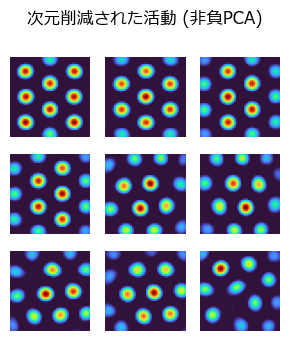

In [45]:
figure(figsize=(3,3.5))
suptitle("次元削減された活動 (非負PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(Y_npca[i, :, :], cmap="turbo")
    axis("off")
end
tight_layout()

In [ ]:
corr_npca = [correlate_fft(Y_npca[i, :, :], Y_npca[i, :, :]) for i in 1:Ng];

In [ ]:
figure(figsize=(3,3.5))
suptitle("自己相関マップ (非負PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(corr_npca[i], cmap="turbo")
    axis("off")
end
tight_layout()

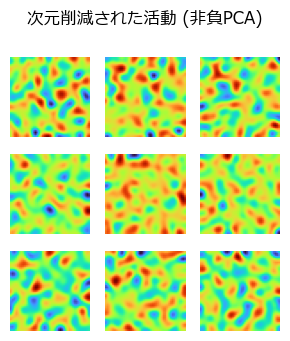

In [74]:
figure(figsize=(3,3.5))
suptitle("次元削減された活動 (非負PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(reshape(G[i, :], step, step), cmap="turbo")
    axis("off")
end
tight_layout()

In [ ]:
size(X_place)

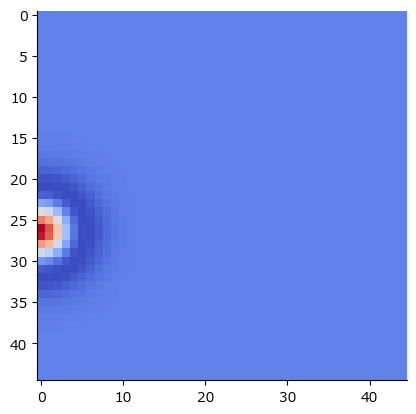

PyObject <matplotlib.image.AxesImage object at 0x000000000234EC70>

In [25]:
imshow(reshape(X_place[10, :], step, step), cmap="coolwarm")

In [ ]:
Σ = X_place' * X_place;

In [ ]:
45^2

In [ ]:
imshow(reshape(ΣΣ[1012, :], step, step))

In [77]:
n = sqNp^2

256

In [88]:
A = 10*rand(n,n)
Q, R = qr(A);

In [ ]:
size(Q)

In [89]:
E = Q * Q';

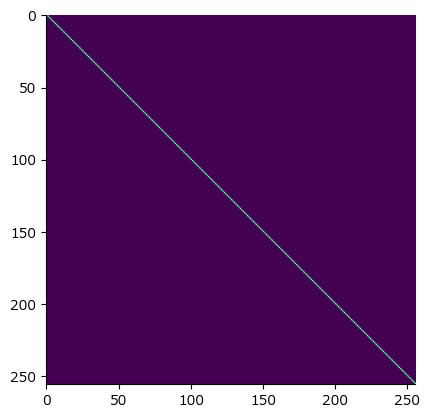

PyObject <matplotlib.image.AxesImage object at 0x0000000009E24070>

In [90]:
imshow(E)

In [91]:
G = Q * X_place;

In [92]:
ΣΣ = G' * G;

In [93]:
Σ = X_place' * X_place;

In [ ]:
#imshow(Q)

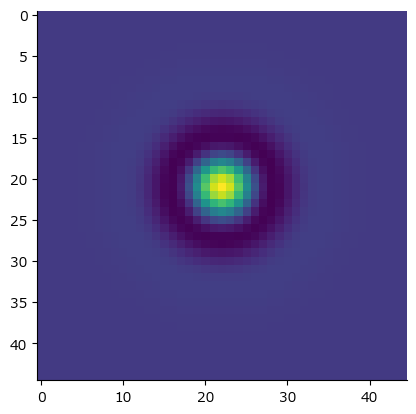

PyObject <matplotlib.image.AxesImage object at 0x0000000002577340>

In [94]:
imshow(reshape(Σ[1012, :], step, step))

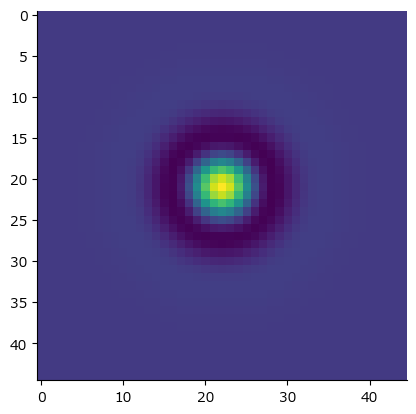

PyObject <matplotlib.image.AxesImage object at 0x00000000F2E40190>

In [98]:
imshow(reshape(ΣΣ[1012, :], step, step))

In [31]:
size(X_place)

(256, 2025)

In [96]:
@time Y, W_npca = HebbianPCA(G; n_components=Ng, η=1e-2, maxiter=10000, func=relu, orthogonal=true);
Y = reshape(Y, (Ng, step, step));

  8.142517 seconds (210.04 k allocations: 3.418 GiB, 2.17% gc time)


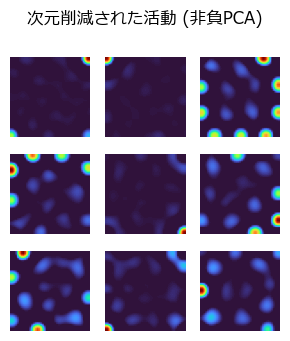

In [97]:
figure(figsize=(3,3.5))
suptitle("次元削減された活動 (非負PCA)")
for i in 1:Ng
    subplot(3,3,i)
    imshow(Y[i, :, :], cmap="turbo")
    axis("off")
end
tight_layout()

*ToDo: 他のgrid cellsのモデルについて*

## 参考文献
```{bibliography}
:filter: docname in docnames
```